# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
#Basics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)

#SKLearn ML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, precision_recall_curve, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

# to save model
#import pickle

In [3]:
booking = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
booking.head()
df = booking.copy()

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


In [10]:
# since this is a predictive analysis, we need to have all variables in a numerical form
# let's check the unique values in each column
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

Recall from the data type output earlier, `sales_channel`, `trip_type`, `flight_day`, `route`, `booking_origin` are of the object dataypes and has to be changed.

In [11]:
# assigns the values 1 & 2 to 'Internet' and 'Mobile' respectively
df.sales_channel.replace(to_replace=['Internet', 'Mobile'], value=[1,2], inplace=True)
df.sales_channel = df.sales_channel.astype(int)

# assigns the values 1, 2, 3 to 'RoundTrip', 'CircleTrip', 'OneWay' respectively
df.trip_type.replace(to_replace=['RoundTrip', 'CircleTrip', 'OneWay'], value=[1,2,3], inplace=True)
df.trip_type = df.trip_type.astype(int)

In [12]:
df.dtypes

num_passengers             int64
sales_channel              int32
trip_type                  int32
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [13]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [14]:
df.dtypes

num_passengers             int64
sales_channel              int32
trip_type                  int32
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [15]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [16]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [17]:
df['route'] = df['route'].astype(str)
df['booking_origin'] = df['booking_origin'].astype(str)

In [18]:
# create a dataframe to encode
import category_encoders as ce
encoder2= ce.BinaryEncoder(cols=['booking_origin', 'route'], return_df=True)
df_encoded = encoder2.fit_transform(df)
df_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route_0,route_1,route_2,...,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,0,0,0,...,0,0,0,0,1,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,0,0,...,0,0,0,0,1,0,0,0,5.52,0
2,2,1,1,243,22,17,3,0,0,0,...,0,0,0,1,0,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,0,0,...,0,0,0,0,1,0,0,1,5.52,0
4,2,1,1,68,22,15,3,0,0,0,...,0,0,0,1,0,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,0,...,0,0,1,0,1,1,0,1,5.62,0
49996,1,1,1,111,6,4,7,1,0,0,...,0,0,1,0,1,0,0,0,5.62,0
49997,1,1,1,24,6,22,6,1,0,0,...,0,0,1,0,1,0,0,1,5.62,0
49998,1,1,1,15,6,11,1,1,0,0,...,0,0,1,0,1,1,0,1,5.62,0


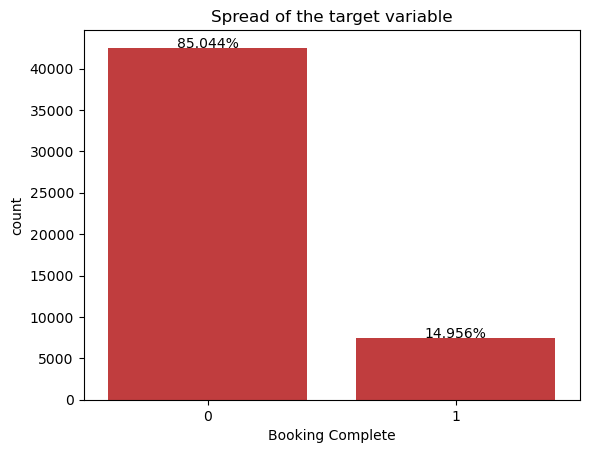

In [19]:
# show the distribution of the target column
ax = sns.countplot(data = df, x = 'booking_complete',  color= sns.color_palette()[3], order = df.booking_complete.value_counts().index)
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('Booking Complete')
plt.title('Spread of the target variable')
plt.show()

This plot shows that the target variable is highly imbalance as 85% didn't complete the booking while only 14.95% completed, this has to be addressed before building a model as a model is as balanced as the dataset used in it's training.

In [20]:
count_no_sub = len(df[df['booking_complete']==0])
count_sub = len(df[df['booking_complete']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of complete booking", pct_of_sub*100)

percentage of no subscription is 85.044
percentage of complete booking 14.956


In [22]:
# using SMOTE to solve the imbalance by up-sampling the lesser outcome
new_x = df_encoded.loc[:, df_encoded.columns != 'booking_complete']
new_y = df_encoded.loc[:, df_encoded.columns == 'booking_complete']

from imblearn.over_sampling import SMOTE
os= SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=0)
columns = x_train.columns

os_data_x,os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y= pd.DataFrame(data=os_data_y, columns=['booking_complete'])
#we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_x))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['booking_complete']==1]))
print("Proportion of no subscription data in oversampled data is", len(os_data_y[os_data_y['booking_complete']==0])/len(os_data_x))
print("proportion of subscription data in oversampled data is", len(os_data_y[os_data_y['booking_complete']==1])/len(os_data_x))

length of oversampled data is  59600
Number of no subscription in oversampled data 29800
Proportion of no subscription data in oversampled data is 0.5
proportion of subscription data in oversampled data is 0.5


In [26]:
# lets use RfE to find out the best and worst performing feature of the dataset
# RFE sets a feature aside and repeat the rocess with the rest of the feature.
df_encoded_vars = df_encoded.columns.values.tolist()
y=['booking_complete']
x = [i for i in df_encoded_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False False  True False False False False  True  True  True  True False
 False False  True  True  True False  True  True  True False False False
  True  True  True False]
[2 2 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 2]


RFE has helped select these features: 'trip_type', 'route_0' , 'route_1', 'route_2', 'route_3', 'route_7', 'route_8', 'route_9', 'booking_origin_1', 'booking_origin_2', 'booking_origin_3', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals',

In [28]:
cols=['trip_type', 'route_0' , 'route_1', 'route_2', 'route_3', 'route_7', 'route_8', 'route_9', 'booking_origin_1', 'booking_origin_2', 'booking_origin_3', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals',]
X = os_data_x[cols]
Y = os_data_y['booking_complete']

In [32]:
pd.set_option('display.max_rows', None)
#implementing the model
import statsmodels.api as sm 
logit_model = sm.Logit(Y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.500861
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.277     
Dependent Variable:    booking_complete  AIC:               59730.6491
Date:                  2023-02-24 00:08  BIC:               59856.5849
No. Observations:      59600             Log-Likelihood:    -29851.   
Df Model:              13                LL-Null:           -41312.   
Df Residuals:          59586             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
trip_type              2.3646   0.0286  82.6501 0.0000  2.3085  2.4206
route_0               -0.9506   0.0284 -33.4524 0.0000 -1.0063 -0.8949
route_1               -1.1087   0.0230 -48.1157 0.0000 -1.1538 -1.0635
route_2               -1.0640   0.0231 -46.1132 0.0000 -1.1092 -1.0187
route_3               -0.3523   0.0211 -16.6814 0.0000 -0.3937 -0.3109
route_7               -0.5269   0.0202 -26.0343 0.0000 -0.5666 -0.4872
route_8               -0.7422   0.0209 -35.5730 0.0000 -0.7831 -0.7013
route_9               -0.7186   0.0210 -34.2893 0.0000 -0.7597 -0.6775
booking_origin_1      -2.3059   0.0282 -81.8504 0.0000 -2.3611 -2.2507
booking_origin_2      -0.9548   0.0841 -11.3525 0.0000 -1.1196 -0.7899
booking_origin_3      -0.4052   0.0287 -14.1066 0.0000 -0.4615 -0.3489
wants_extra_baggage    0.2799   0.0215  13.0035 0.0000  0.2377  0.3221
wants_preferred_seat  -0.2089   0.0259  -8.0739 0.0000 -0.2596 -0.1582
wants_in_flight_meals -0.3297   0.0228 -14.4347 0.0000 -0.3744 -0.2849
======================================================================

"""

all has a p-value smaller than 0.05 which is a good thing.

In [49]:
# logistic model fitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [50]:
# predicting the test set results and calcualting the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.771812


In [35]:
# confusion Matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[6643 2277]
 [1803 7157]]


In [36]:
# compute precision, recall, F-measure and support
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      8920
           1       0.76      0.80      0.78      8960

    accuracy                           0.77     17880
   macro avg       0.77      0.77      0.77     17880
weighted avg       0.77      0.77      0.77     17880



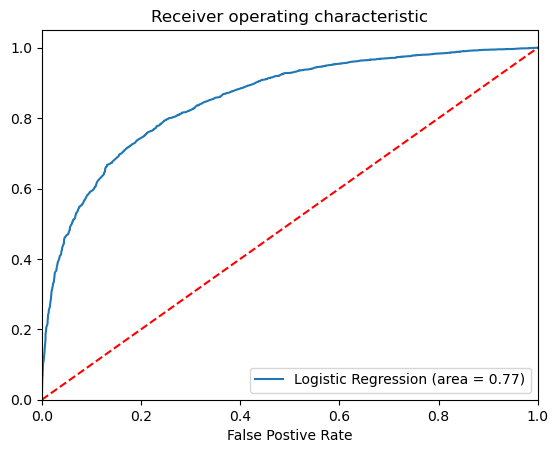

In [39]:
# ROC CUrve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Here the dotted line represents the ROC curve of a purely random classifier: a good classifier stays as far away from that line as possible

In [53]:
# let's use the chi value to find the most important feature
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(os_data_x, os_data_y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(os_data_x.columns)

features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
2,trip_type,4.245473
24,wants_extra_baggage,20.411861
5,flight_hour,85.035804
11,route_4,87.689180
17,booking_origin_0,87.807107
1,sales_channel,124.673126
20,booking_origin_3,210.421872
0,num_passengers,261.639929
10,route_3,295.739546
19,booking_origin_2,312.847656


In [54]:
feat = pd.DataFrame(features_scores)

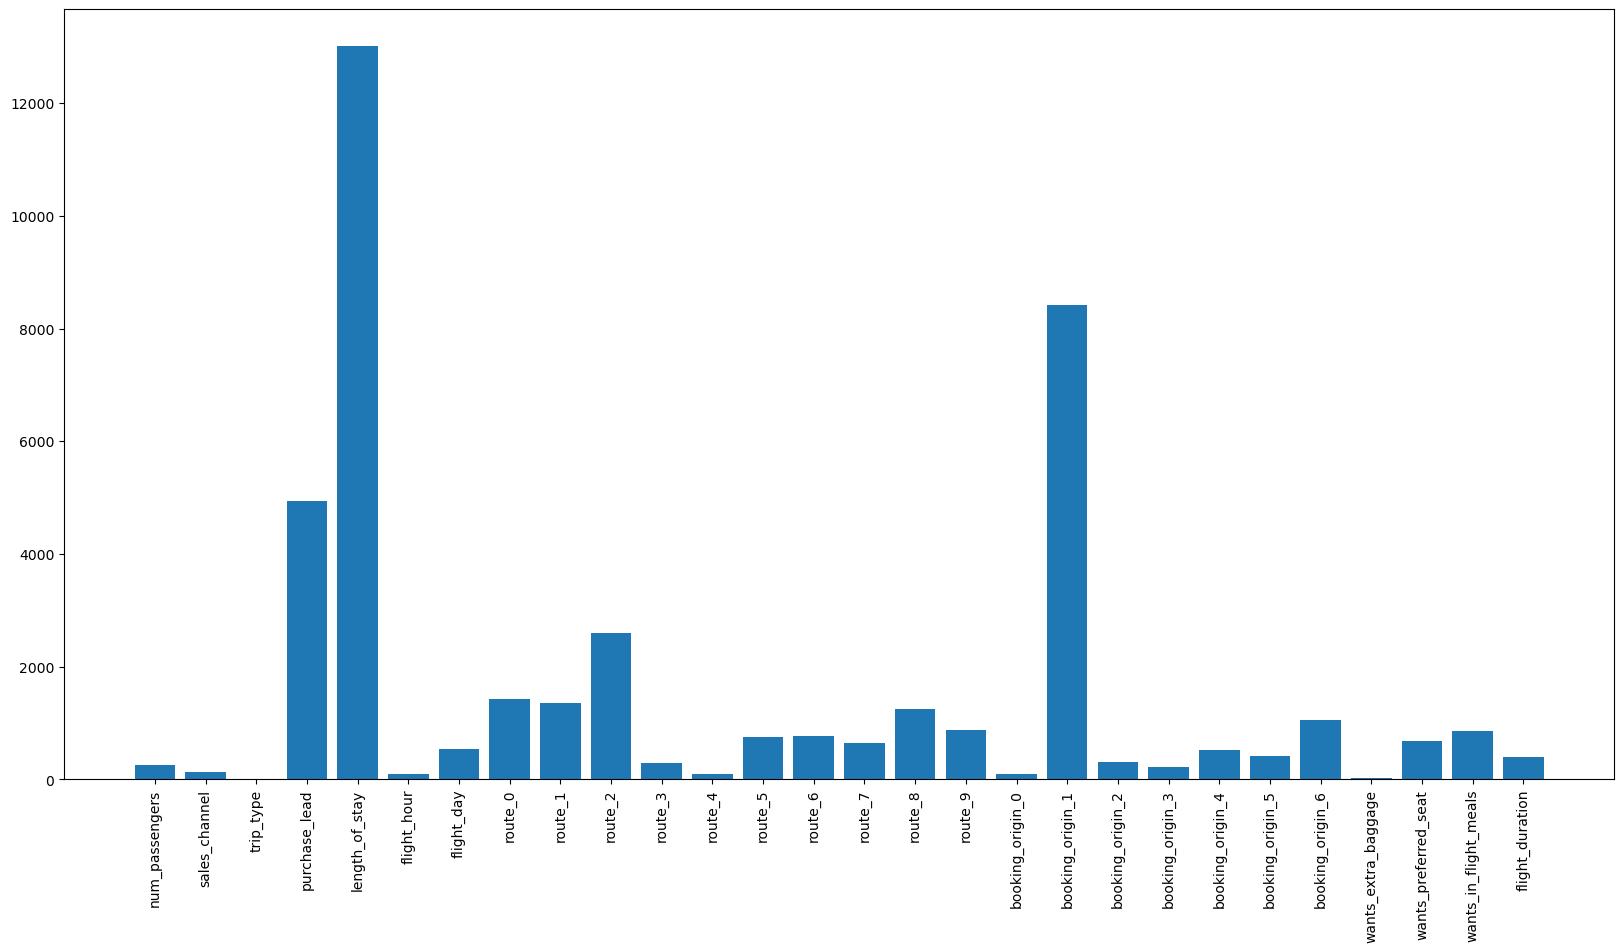

In [56]:
plt.figure(figsize= (20, 10))
plt.bar(x=feat['Features'], height=feat['Score'])
plt.xticks(rotation=90);